In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = r"C:\Users\chand\Downloads\archive\retail_sales_dataset.csv" 
df = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64

In [9]:
df.drop_duplicates(inplace=True)

# Handle missing values
missing_summary = df.isnull().sum()
print("\nMissing Values:\n", missing_summary)


Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [11]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [12]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))



Descriptive Statistics:
        Transaction ID                           Date Customer ID  Gender  \
count      1000.000000                           1000        1000    1000   
unique             NaN                            NaN        1000       2   
top                NaN                            NaN    CUST1000  Female   
freq               NaN                            NaN           1     510   
mean        500.500000  2023-07-03 00:25:55.200000256         NaN     NaN   
min           1.000000            2023-01-01 00:00:00         NaN     NaN   
25%         250.750000            2023-04-08 00:00:00         NaN     NaN   
50%         500.500000            2023-06-29 12:00:00         NaN     NaN   
75%         750.250000            2023-10-04 00:00:00         NaN     NaN   
max        1000.000000            2024-01-01 00:00:00         NaN     NaN   
std         288.819436                            NaN         NaN     NaN   

               Age Product Category     Quantity  

In [13]:
if 'Date' in df.columns and 'Sales' in df.columns:
    sales_over_time = df.groupby('Date')['Sales'].sum()
    plt.figure(figsize=(12, 5))
    sales_over_time.plot()
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.grid(True)
    plt.show()

In [14]:
if 'CustomerID' in df.columns:
    customer_sales = df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 4))
    customer_sales.head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Customers by Sales")
    plt.ylabel("Total Sales")
    plt.show()

In [15]:
if 'Product' in df.columns:
    product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 4))
    product_sales.head(10).plot(kind='bar', color='orange')
    plt.title("Top 10 Products by Sales")
    plt.ylabel("Total Sales")
    plt.show()

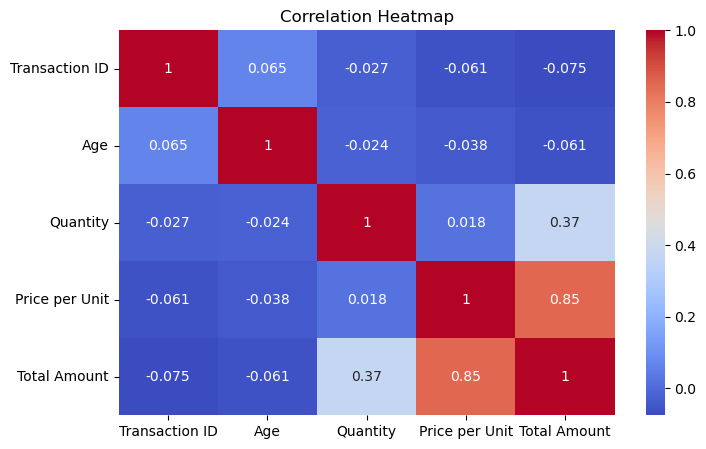

In [16]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
print("\n--- Recommendations Framework ---")
print("1. Focus on high-performing products for promotions.")
print("2. Identify slow-moving items and consider discounts or bundling.")
print("3. Analyze peak sales periods to optimize inventory.")
print("4. Target top customers with loyalty programs.")
print("5. Explore underperforming customer segments for re-engagement.")


--- Recommendations Framework ---
1. Focus on high-performing products for promotions.
2. Identify slow-moving items and consider discounts or bundling.
3. Analyze peak sales periods to optimize inventory.
4. Target top customers with loyalty programs.
5. Explore underperforming customer segments for re-engagement.
